---
# Введение в Tensorflow
---

### Table of Contents
- - -
<font size = 4 space = 0.4>
    
* [1. Базовые понятия Tensorflow toolkit](#1.-Базовые-понятия-Tensorflow-toolkit)  
    * [1.1 Введение](#1.1-Введение)
    * [1.2 Типы данных](#1.2-Типы-данных)
    * [1.3 Примеры операций](#1.3-Примеры-операций)
    * [1.4 Примеры работы с графом](#1.4-Примеры-работы-с-графом)
    * [1.5 Примеры активационных функций](#1.5-Примеры-активационных-функций)
* [2. Регрессия в Tensorflow](#2.-Регрессия-в-Tensorflow)
    * [2.1 Линейная регрессия](#2.1-Линейная-регрессия)
    * [2.2 Нелинейная регрессия](#2.2-Нелинейная-регрессия)
* [3. Простая сеть в Tensorflow](#3.-Простая-сеть-в-Tensorflow)
    * [3.1 Полносвязная сеть](#3.1-Полносвязная-сеть)
    * [3.2 Задания](#3.2-Exercises)
* [4. Сверточная сеть в Tensorflow](#4.-Сверточная-сеть-в-Tensorflow)
    * [4.1 Пример сверточной сети](#4.1-Пример-сверточной-сети)
    * [4.2 Упражнения](#4.2-Exercises)
    

# 1. Базовые понятия Tensorflow toolkit

## 1.1 Введение

TensorFlow это открытая библиотека работы с данными с бекэндом Си (CUDA для GPU) и фронт-эндом высокоуровневых языков программрования.
Основное использование - разработка нейронных сетей. 
Библиотека разрабатывается в компании Google.

In [1]:
import tensorflow as tf

<font size = 3>

Основные понятия в библиотеке это:
1. Тензор (многомерный массив входных данных), 


2. граф - последовательность операций над тензором (описывается на python, затем исполняется на низко-уровневых языках) 


3. сессия - выполнение операций над описаным графом



![image_tensor.png](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

In [2]:
3. # a rank 0 tensor; a scalar with shape [],

[1., 2., 3.] # a rank 1 tensor; a vector with shape [3]

[[1., 2., 3.], 
 [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]

[[[1., 2., 3.]], 
 [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

рассмотрим пример простой процедуры с двумя константами

In [3]:
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0) # also tf.float32 implicitly

print(a)
print(b)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


допустим, мы хотим их сложить

In [4]:
total = a + b
print(a)
print(b)
sess = tf.Session()
print(sess.run(total)) 

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
7.0


<font size =3, color = black|brown>

**!** обратите внимение, что вы запускаете операцию следующим кодом
```python
sess.run(total)
```
        

при этом сам код 
```python
total = a + b
print(a)
print(b)
```
можно представить как следующий граф

![image.png](//www.tensorflow.org/images/getting_started_add.png)

А вот пример более сложного графа нелинейной регресии

![softmax_graph.png](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1520609448/comp_graph_oncyni.png)

## Exercise 
попробуйте посчитать сумму следующих тензоров в Tensorflow
```python
a = [3.9,4.6]
b = [5.1,2.4]
```

## 1.2 Типы данных

Основные типы данных в Tensorflow
* `tf.constant`     - константы 


* `tf.Variable`     - внутренние переменные  графа


* `tf.placeholder`  - внешиние переменные (через них можно менять данные в графах)


In [5]:
import tensorflow as tf
a = tf.constant(3.0, dtype=tf.float32)
k = tf.Variable(tf.zeros([1]), name="k")
x = tf.placeholder(tf.float32, shape=(1024, 1024))
#d = tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])

print(a)
print(k)
print(x)

Tensor("Const_2:0", shape=(), dtype=float32)
<tf.Variable 'k:0' shape=(1,) dtype=float32_ref>
Tensor("Placeholder:0", shape=(1024, 1024), dtype=float32)


TensorFlow использует numpy для представления данных, соответственно данные имеют:

1. a data type (``float32, int32``, or string, for example)


2. a shape

In [6]:
print(a.dtype)
print(k.dtype)
print(x.dtype)

print(a.shape)
print(k.shape)
print(x.shape)

<dtype: 'float32'>
<dtype: 'float32_ref'>
<dtype: 'float32'>
()
(1,)
(1024, 1024)


пример в Variable (главная цель Variable - сохранить внутреннее состояние графа)

In [7]:
x = tf.constant(-2.0, name="x", dtype=tf.float32)
a = tf.constant(5.0,  name="a", dtype=tf.float32)
b = tf.constant(13.0, name="b", dtype=tf.float32)

y = tf.Variable(tf.add(tf.multiply(a, x), b))

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print (session.run(y))

3.0


пример с placeholder (главная цель - передать в граф изменяемые значения)

In [8]:
import tensorflow as tf

x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32, name="y")

z = tf.multiply(x, y, name="z")

with tf.Session() as session:
    print (session.run(z, feed_dict={x: 2.1, y: 3.0}))

6.2999997


Кроме ``tf.Variable``, переменные в графах неизменные, то есть в кажой сессии они будут разными ( с ранзыми адресами) хотя называться могут одинаково 

In [9]:
# Create a variable with an initial value of 1
some_var = tf.Variable(1)

# Create an operation to run variable initializers
init_op = tf.global_variables_initializer()
 
# Create an operation to replace the value held by some_var to 3
assign_op = some_var.assign(3)
 
# Set up two instances of a session
sess1 = tf.Session()
sess2 = tf.Session()

# Initialize variables in both sessions
sess1.run(init_op)
sess2.run(init_op)
print(sess1.run(some_var)) # Outputs 1

# Change some_var in session1
sess1.run(assign_op)
print(sess1.run(some_var)) # Outputs 3
print(sess2.run(some_var)) # Outputs 1

# Close sessions
sess1.close()
sess2.close()

1
3
1


## 1.3 Примеры операций 


1 Каждый тензор имеет свой ранг 


```python 
    r = tf.rank(my_image)
```


In [10]:
my_image = tf.zeros([10, 299, 299, 3])  # batch x height x width x color

r = tf.rank(my_image)

print(r)

Tensor("Rank:0", shape=(), dtype=int32)


2 Тензор может быть получен из других объектов в питоне

In [11]:
import numpy as np
tensor_2d   = np.array(np.random.rand(2, 2), dtype='float32')

m1 = tf.convert_to_tensor(tensor_2d)

with tf.Session() as session:
    print ("\n",session.run(m1))



 [[0.33966473 0.8390885 ]
 [0.78871644 0.71603507]]


3 Над тензором можно проводить простые операции

In [12]:
tensor_2d_1 = np.array(np.random.rand(2, 2), dtype='float32')
m2 = tf.convert_to_tensor(tensor_2d_1)


mat_product = tf.matmul(m1, m2)
mat_sum     = tf.add(m2, m1)


with tf.Session() as session:
    print ("\n",session.run(mat_sum))
    print ("\n",session.run(mat_product))


 [[1.0543936  0.85999733]
 [1.7712224  1.0915694 ]]

 [[1.0671777  0.32220858]
 [1.2672272  0.28538692]]


4 можно провоить также матричные операции

In [13]:
mat_det    = tf.matrix_determinant(m1)
m_tranpose = tf.transpose(m1)
m_inv      = tf.matrix_inverse(m1)

with tf.Session() as session:
    print ("\n",session.run(mat_det))
    print ("\n",session.run(m_tranpose))
    print ("\n",session.run(m_inv))


 -0.41859105

 [[0.33966473 0.78871644]
 [0.8390885  0.71603507]]

 [[-1.7105838  2.0045545]
 [ 1.8842171 -0.8114477]]


5 или решать уравнения  

In [14]:
m_solve    = tf.matrix_solve(m2, [[1], [1]])

with tf.Session() as session:
    print ("\n",session.run(m_solve))


 [[ 1.4307364]
 [-1.0803462]]


также можно делать с ними функции

In [15]:
def convert(v, t=tf.float32):
    return tf.convert_to_tensor(v, dtype=t)

In [16]:
x = convert(np.array([(1, 2, 3),
                      (4, 5, 6),
                      (7, 8, 9)]), tf.int32)
print(x)

Tensor("Const_5:0", shape=(3, 3), dtype=int32)


к тензорам применима группа опеаций `reduce`

In [17]:
red_sum_0 = tf.reduce_sum(x)
red_sum = tf.reduce_sum(x, axis=1)

with tf.Session() as session:
    print ("Reduce sum without passed axis parameter: ", session.run(red_sum_0))
    print ("Reduce sum with passed axis=1: ", session.run(red_sum))

Reduce sum without passed axis parameter:  45
Reduce sum with passed axis=1:  [ 6 15 24]


In [18]:
red_prod_0 = tf.reduce_prod(x)
red_prod = tf.reduce_prod(x, axis=1)

red_min_0 = tf.reduce_min(x)
red_min = tf.reduce_min(x, axis=1)

red_max_0 = tf.reduce_max(x)
red_max = tf.reduce_max(x, axis=1)

red_mean_0 = tf.reduce_mean(x)
red_mean = tf.reduce_mean(x, axis=1)

with tf.Session() as session:     
    print ("Reduce product without axis parameter: ", session.run(red_prod_0))
    print ("Reduce product     with passed axis=1: ", session.run(red_prod))

    print ("\n \t Reduce min without axis parameter: ", session.run(red_min_0))
    print ("\t Reduce min     with passed axis=1: ", session.run(red_min))

    print ("\n Reduce max without axis parameter: ", session.run(red_max_0))
    print (" Reduce max     with passed axis=1: ", session.run(red_max))

    print ("\n \t Reduce mean without axis parameter: ", session.run(red_mean_0))
    print ("\t Reduce mean     with passed axis=1: ", session.run(red_mean))  

Reduce product without axis parameter:  362880
Reduce product     with passed axis=1:  [  6 120 504]

 	 Reduce min without axis parameter:  1
	 Reduce min     with passed axis=1:  [1 4 7]

 Reduce max without axis parameter:  9
 Reduce max     with passed axis=1:  [3 6 9]

 	 Reduce mean without axis parameter:  5
	 Reduce mean     with passed axis=1:  [2 5 8]


In [19]:
bool_tensor = convert([(True, False, True), 
                       (False, False, True), 
                       (True, False, False)], tf.bool) 

red_bool_all_0 = tf.reduce_all(bool_tensor)
red_bool_all = tf.reduce_all(bool_tensor, axis=1)

red_bool_any_0 = tf.reduce_any(bool_tensor)
red_bool_any = tf.reduce_any(bool_tensor, axis=1)

with tf.Session() as session: 
    print ("\n Reduce all without axis parameter: ", session.run(red_bool_all_0))
    print ("\n Reduce all     with passed axis=1: ", session.run(red_bool_all))

    print ("\n Reduce any without axis parameter: ", session.run(red_bool_any_0))
    print ("\n Reduce any     with passed axis=1: ", session.run(red_bool_any))


 Reduce all without axis parameter:  False

 Reduce all     with passed axis=1:  [False False False]

 Reduce any without axis parameter:  True

 Reduce any     with passed axis=1:  [ True  True  True]


In [20]:
print(x)

Tensor("Const_5:0", shape=(3, 3), dtype=int32)


## 1.4 Примеры работы с графом 

простые операции над тензорами можно объеденить в графы

[вот некоторые дополнительные примеры](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/1_Introduction/basic_operations.py) 

пример простого графа

In [24]:
a = tf.constant(2)
b = tf.constant(3)

# Launch the default graph.
with tf.Session() as sess:
    print("a=2, b=3")
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

a=2, b=3
Addition with constants: 5
Multiplication with constants: 6


лучше использовать встроенные операции

In [25]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


In [26]:
import numpy as np

matrix1 = tf.constant([[3., 3.]])

matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix multiplication.
product = tf.matmul(matrix1, matrix2)


with tf.Session() as sess:
    result = sess.run(product)
    print(np.squeeze(result))


12.0


In [27]:
product2 = tf.cast(product,'int32')
with tf.Session() as sess:
    result = sess.run(product2)
    print(np.squeeze(result))

12


In [28]:
x = tf.constant(2, dtype='float32')
y = tf.constant(2, dtype='float32')

z = tf.multiply(x, y,'z')

conditional_result = tf.cond(x < y, lambda: tf.add(x, z), lambda: tf.square(y))

with tf.Session() as sess:
    result = sess.run(conditional_result)
    print(np.squeeze(result))

4.0


## 1.5 Примеры активационных функций


[тут можно посмотреть дополнительные примеры](https://github.com/MorvanZhou/Tensorflow-Tutorial/tree/master/tutorial-contents)

In [29]:
# artifical data
x = np.linspace(-5, 5, 200)     # x data, shape=(100, 1)

In [30]:
# following are popular activation functions
y_relu     = tf.nn.relu(x)
y_sigmoid  = tf.nn.sigmoid(x)
y_tanh     = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)


In [31]:
sess = tf.Session()

y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

In [32]:
import matplotlib.pyplot as plt

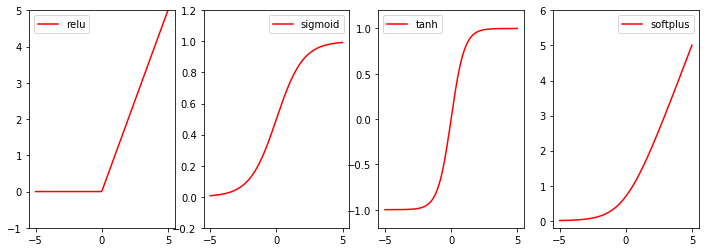

In [33]:
# plt to visualize these activation function
plt.figure(1, figsize=(12, 4))
plt.subplot(141)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(142)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(143)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(144)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

### Exercise
написать ступенчатую и знаковую функции активации

In [34]:
x = tf.constant(2, dtype='float32')

#return y_step and y_sign

NameError: name 'y_step' is not defined

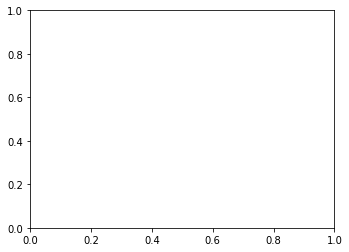

In [35]:
# plt to visualize these activation function
plt.figure(1, figsize=(12, 4))
plt.subplot(121)
plt.plot(x, y_step, c='red', label='sign')
plt.ylim((-1, 5))
plt.legend(loc='best')

# plt to visualize these activation function
plt.figure(1, figsize=(12, 4))
plt.subplot(122)
plt.plot(x, y_sign, c='red', label='sign')
plt.ylim((-1, 5))
plt.legend(loc='best')

# 2. Регрессия в Tensorflow 


[Go to the table of Contents](#Table-of-Contents)

## 2.1 Линейная регрессия

   

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

расмотрим простой пример $y=x$ 

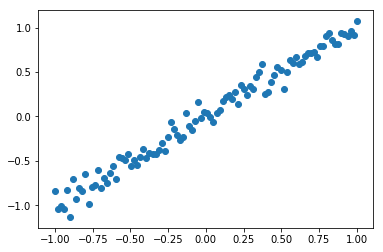

In [36]:
tf.set_random_seed(1)
np.random.seed(1)

# artifical data
x     = np.linspace(-1, 1, 100)[:, np.newaxis]  # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y     = x + noise   # shape (100, 1) + some noise

# plot data
plt.scatter(x, y)
plt.show()

создадим два `placeholder` для графа регрессии

In [37]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

также понадобятся дву переменные для весов и смещений

In [38]:
# Set model weights
W = tf.Variable(tf.random_normal((1,1)), name="weight")
b = tf.Variable(tf.random_normal((1,1)), name="bias")

теперь можно описать модель

In [39]:
output = tf.add(tf.multiply(tf_x, W), b)

также выбирем функцию активации

 $$L = (y-\hat y)^2$$

In [40]:
loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost

оптимизацию модели будем проводить градиентными спуском

In [41]:
step_grad = 0.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate=step_grad)
train_op = optimizer.minimize(loss)

теперь можно преступить

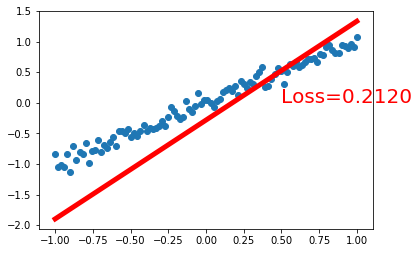

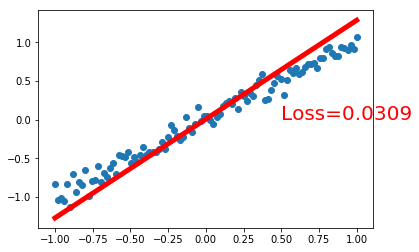

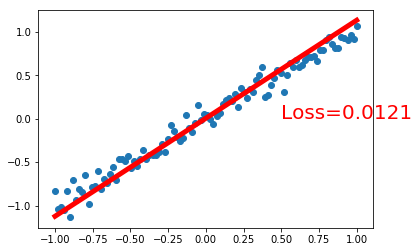

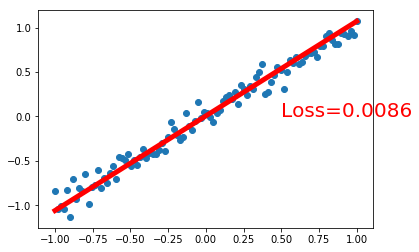

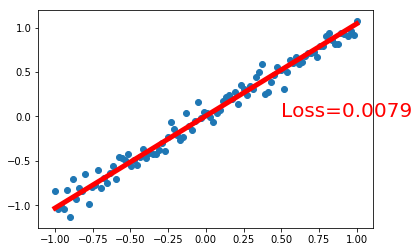

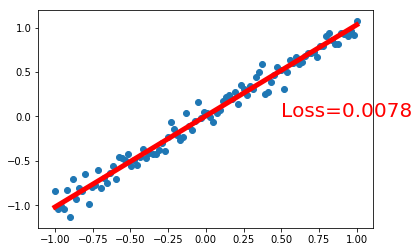

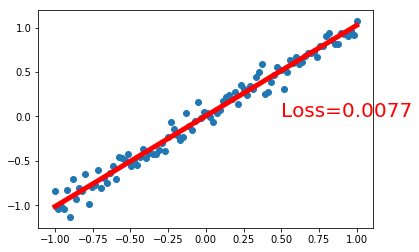

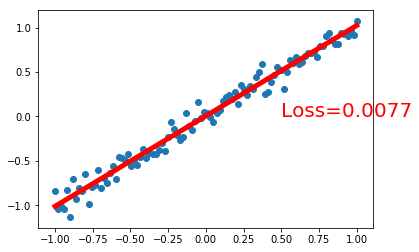

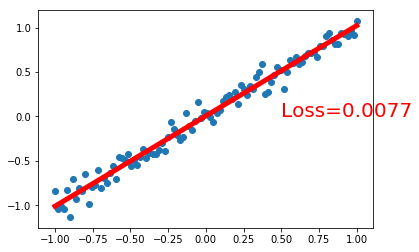

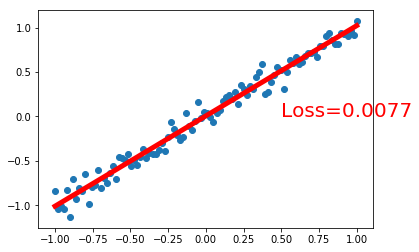

In [43]:
epoch = 20

sess = tf.Session()                                 # control training and others

sess.run(tf.global_variables_initializer())         # initialize var in graph


for step in range(epoch):
    
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    
    if step % (epoch/10) == 0:
        
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
plt.show()

## 2.2 Нелинейная регрессия 

### Exercise

попытайтесь собрать нелинейную регрессию сами для следующего случая

(1000, 2) (1000,)


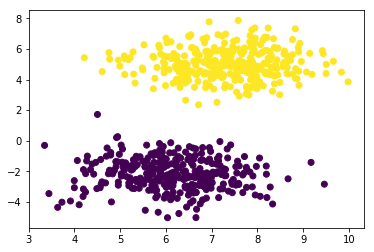

In [44]:
import sklearn
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=1000, n_features=2)
print(x.shape, y.shape)

x = x[y!=2]
y = y[y!=2]

plt.scatter(x[:,0],x[:,1], c=y)


# 3. Простая сеть в Tensorflow 

[Go to the table of Contents](#Table-of-Contents)

## 3.1 Полносвязная сеть 


### Описание полносвязной сети

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

создадим набор данных

(1000, 2) (1000,)


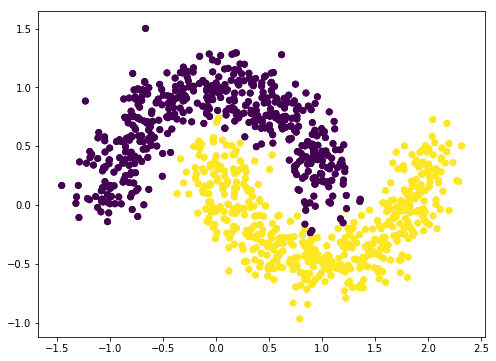

In [46]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

x,y = make_moons(n_samples=1000, noise=0.15)
print(x.shape, y.shape)

plt.figure(figsize=(8,6))

plt.scatter(x[:,0],x[:,1], c=y)

plt.scatter(x[:, 0], x[:, 1], c=y)

plt.show()

опишим сесть

The next one is creation of placeholders for our inputs and outputs

In [47]:
tf_x = tf.placeholder(tf.float32, [None, x.shape[1]])     # input x
tf_y = tf.placeholder(tf.int32,    None)     # input y

<font size =4 color = brown>

**!** обратите внимание на размерность `None` она тут значит, что размерность может быть любой

In [48]:
print(tf_y)
print(tf_x)

Tensor("Placeholder_6:0", dtype=int32)
Tensor("Placeholder_5:0", shape=(?, 2), dtype=float32)


Опишим сеть, ее структура будет, примерно как на картинке ниже, только больше нейронов в слое

![nn_fc](https://i.stack.imgur.com/g5HxU.png)

In [49]:
def neural_net(tf_x, training_state = True):
    ''' each hiden layer is a fully connected layer (dense layer) 
        with batch normalization and droput in the end 
        
        args:
        *   tf_x input tensor
        *   training_state - true if you are going to use drop out
        
        return:
        *   output - is the result of the neural network prediction
    '''    
    # neural network layers
    # first hidden layer
    l1     = tf.layers.dense(tf_x, 50, tf.nn.relu)           
    l1     = tf.layers.batch_normalization(l1)               
    l1     = tf.layers.dropout(l1, rate=0.2, training=training_state)  

    # second hidden layer
    l2     = tf.layers.dense(l1,   50, tf.nn.relu)           
    l2     = tf.layers.batch_normalization(l2)               
    l2     = tf.layers.dropout(l2, rate=0.2, training=training_state)  
    
    # Third hidden layer
    l3     = tf.layers.dense(l2,   50, tf.nn.relu)           
    l3     = tf.layers.batch_normalization(l3)               
    l3     = tf.layers.dropout(l3, rate=0.2, training=training_state)  

    # output layer
    output = tf.layers.dense  (l3,  2, tf.nn.sigmoid)        # output layer
    
    return output

In [50]:
output = neural_net(tf_x)

для оптимизации будем использовать взаимную энтропию

$$ L = \sum_{i}^{k}{y\log{\hat y}}$$

* где 
    * k чисоло классов (2 в нашем случае),
    * y ответ
    * $\hat y$ результат классификации

In [51]:
loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)  # compute cost

также задаим метрику для оценки качества обучения

In [52]:
accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
                labels = tf.squeeze(tf_y), 
                predictions = tf.argmax(output, axis=1)  )[1]

и выберем оптимизатор

In [53]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=5e-3)

оптимизировать будем по минимуму значения loss

In [54]:
train_op = optimizer.minimize(loss)

теперь проинициализируем сеть

In [55]:
sess    = tf.Session() # control training and others

init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

sess.run(init_op)     # initialize var in graph

и начем обучать

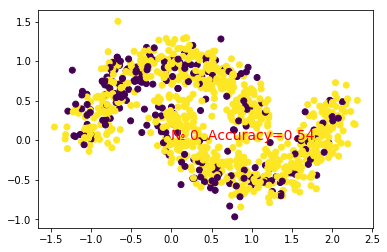

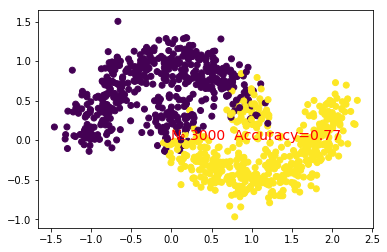

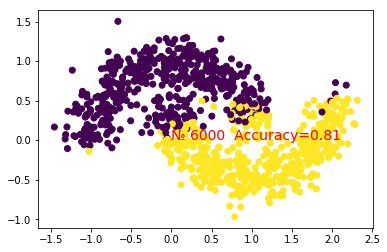

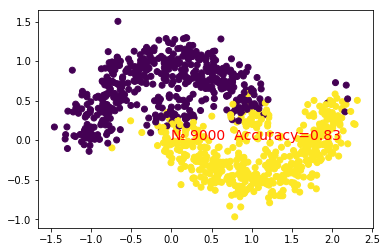

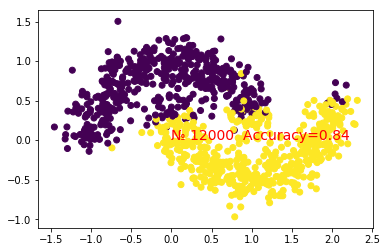

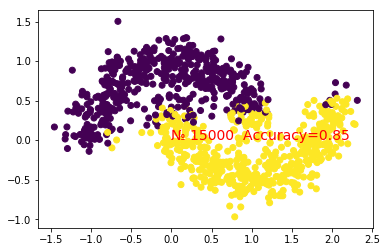

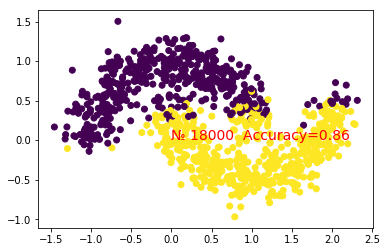

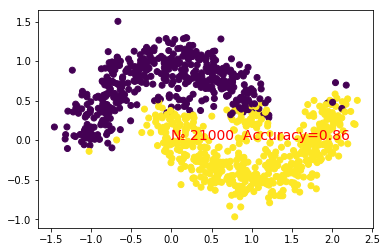

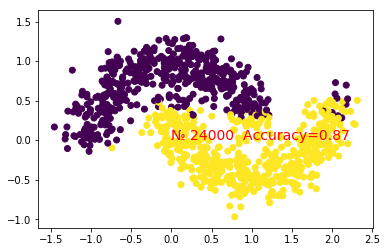

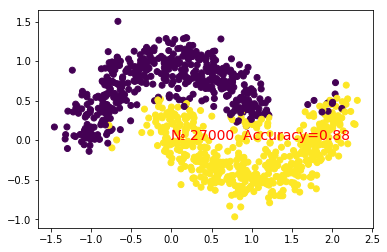

In [56]:
epoch = int(3e4)

for step in range(epoch):
    # train and net output
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step % (epoch/10) == 0:
        # plot and show learning process
        plt.cla()        
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1))
        plt.text(0, 0, '№ %d  Accuracy=%.2f' % (step,acc), fontdict={'size': 14, 'color': 'red'})
        plt.pause(0.1)

plt.show()

модель можно сохранить

In [59]:
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()

model_path = "model.h5py"

# Save model weights to disk
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)

Model saved in file: /tmp/model.h5py


### Предсказание

загрузим модель

In [60]:
model_path = "model.h5py"

# Restore model weights from previously saved model
load_path = saver.restore(sess, model_path)
print("Model restored from file: %s" % save_path)

INFO:tensorflow:Restoring parameters from /tmp/model.h5py
Model restored from file: /tmp/model.h5py


запустим процедуру предсказания

In [61]:
# print 35 predictions from test data
test_output = sess.run(output, {tf_x: x[10:45]})
print(test_output.argmax(1))
print(y[10:45])


[0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0]
[0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0]


## 3.2 Задания 

1. проаназировать результаты обучения модели в зависимости от таких параметров, как скорость обучения и оптимизатор (используйте несколько вариантов)
[тут есть описание](http://ruder.io/optimizing-gradient-descent/)

2. исследовать результаты работы сети в зависимости от архитектуры (число, параметры слоев и т.д.)

3. попробывать запустить сеть для XOR и Circle  моделей данных из предыдущей работы

# 4. Сверточная сеть в Tensorflow 

[Go to the table of Contents](#Table-of-Contents)

## 4.1 Пример сверточной сети 

### Описание сети

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph() 

рассмотрим набор данных - рукописные цифры

In [2]:
mnist  = input_data.read_data_sets('./mnist', one_hot=True)  # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print(test_x.shape)
image_test_x = test_x.reshape([-1,28,28,1])
print(image_test_x.shape)
test_y_vect = test_y.argmax(axis=1)

(2000, 784)
(2000, 28, 28, 1)


In [4]:
print(test_y.shape)

test_y_vect = test_y.argmax(axis=1)

print(test_y_vect.shape)

(2000, 10)
(2000,)


вот пример цифры 

(55000, 784)
(55000, 10)


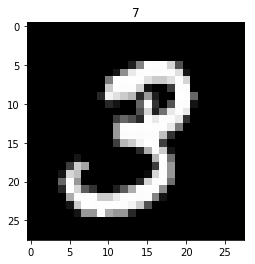

In [5]:
# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)
plt.imshow(mnist.train.images[1].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0])); plt.show()

### Опишим модель LeNet

![LeNET](https://www.pyimagesearch.com/wp-content/uploads/2016/06/lenet_architecture.png)

модель будет иметь следующие парамерты 

In [6]:
tf.set_random_seed(1)
np.random.seed(1)

N_CLASSES     = 10  # 10 digits
IMAGE_SIZE    = (28,28) 
IMAGE_SIZE_1D = 28*28 #784
IMAGE_MAX     = 255.0 # MAXIMUM value for each pixel (due to 8-bit resolution)


#### 1. **Сверточный слой**

> **принцип работы 2d convolution слоя**

![conv_2d.gif](http://machinelearninguru.com/_images/topics/computer_vision/basics/convolutional_layer_1/stride1.gif)

   >тут можно посмотреть доп.информацию [A guide to convolution arithmetic for deep
learning](https://arxiv.org/pdf/1603.07285v1.pdf)

In [7]:
def conv2d(x, W, b, strides=1):
    
    # Conv2D wrapper, with bias and relu activation    
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    
    x = tf.nn.bias_add(x, b)
    
    return tf.nn.relu(x) 

<font size = 4 color =brown>

**!** вообще говоря можно вызвать слой сразу :
```python
conv2 = tf.layers.conv2d(inputs, 
                         filters,
                         kernel_size, 
                         strides, 
                         padding, 
                         activation)
```
но в учебных целях мы напишим сеть руками


### слой передискретизации



>** принцип maxpooling**

![pooling.gif](https://cdn-images-1.medium.com/max/1000/1*lRVHY6UXH7K5sfr9L_YVvg.gif)

In [8]:
def maxpool2d(x, k=2):    
    return tf.nn.max_pool(x, 
                          ksize   = [1, k, k, 1], 
                          strides = [1, k, k, 1],
                          padding = 'SAME')

<font size =4 color = brown>

**!** втсроенная функция имеет вид
```python
output = tf.layers.max_pooling2d(
                            inout,
                            pool_size,
                            strides) 
```

### 3. **слой преобразования изображения в вектор**

>операция flatten (reshape)

In [9]:
def flatFrom2D(x, reshape_size):    
    return tf.reshape(x, [-1, reshape_size]) 


### 4. **Полносвязный слой классификации**

будем использовать 2 таких слоя (см. архитектуру сети) 
$$ h = \sigma(Z)$$
* где h выход слоя 
* $\sigma$ функция активации

скрытый слой использует relu, выходной sofmax 
* $Z=$ $W^TX+B$


In [10]:
def dense(x, W, B, activation='relu'):
    
    out = tf.add(tf.matmul(x, W), B)
    
    if activation=='relu':
        out = tf.nn.relu(out)
        
    elif activation=='sofmax':
        out = tf.nn.softmax(out)
        
    return out

### 5. Функция потерь

In [11]:
def loss_function(lables, outputs):
    return tf.losses.softmax_cross_entropy(onehot_labels=lables, logits=outputs)           # compute cost


### 6. Оптимизация

In [12]:
def training(loss_val, learning_rate):
    return tf.train.AdamOptimizer(learning_rate).minimize(loss_val)

### 7. Оценка точности

In [13]:
def get_accuracy(inputs, lables):
    
    return tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
                        labels=tf.argmax(lables, axis=1), 
                        predictions=tf.argmax(inputs, axis=1),)[1]

### Обучение сети

**инициализация параметров**

In [52]:
def conv_net_init(n_classes = 10):
    
    xav_init = tf.contrib.layers.xavier_initializer_conv2d()
    
    weights = {'W0': tf.get_variable('W0', 
                                     shape=(3,3,1,32),     
                                     initializer=xav_init),
               
               'W1': tf.get_variable('W1', 
                                     shape=(3,3,32,64),    
                                     initializer=xav_init  ),
               'W2': tf.get_variable('W2', 
                                     shape=(3,3,64,128),    
                                     initializer=xav_init  ),
               'W3': tf.get_variable('W3',   
                                     shape=(4*4*128, 128), 
                                     initializer=xav_init  ),
               'W4': tf.get_variable('W4', 
                                     shape=(128, n_classes), 
                                     initializer=xav_init  )}
    
    biaes = {'B0': tf.get_variable('B0',   
                                   shape=(32), 
                                   initializer=xav_init),
             'B1': tf.get_variable('B1',   
                                   shape=(64), 
                                   initializer=xav_init),             
             'B2': tf.get_variable('B2',   
                                   shape=(128), 
                                   initializer=xav_init),
             'B3': tf.get_variable('B3',   
                                   shape=(128), 
                                   initializer=xav_init),
             'B4': tf.get_variable('B4',   
                                   shape=(n_classes), 
                                   initializer=xav_init)} 
   
    return weights,biaes


**описание сети**

In [55]:
def conv_net(x, W,B):
    
    conv1 = conv2d(x, W['W0'], B['B0'])

    conv1 = maxpool2d(conv1, k=2)

    conv2 = conv2d(conv1, W['W1'], B['B1'])

    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, W['W2'], B['B2'])

    conv3 = maxpool2d(conv3, k=2)

    fc1   = flatFrom2D(conv3, W['W3'].get_shape().as_list()[0])    
   
    fc1   = dense(fc1, W['W3'], B['B3'], activation='relu')

    out   = dense(fc1, W['W4'], B['B4'], activation='softmax')

    return out

**компиляция модели**

In [56]:
def compil_training_model(inputs, targets, learning_rate):
    
    W,B  = conv_net_init()
    
    predictor = conv_net(inputs, W,B)

    loss_val  = loss_function(lables=targets, outputs=predictor)
    
    optimizer = training(loss_val, learning_rate)
    
    return optimizer, loss_val, predictor, W, B

**визуализация при помощи t-SNE**

In [57]:
from matplotlib import cm
from sklearn.manifold import TSNE 

In [58]:
tsne   = TSNE(random_state=17)
X_tsne = tsne.fit_transform(test_x)

In [59]:
plt.figure(figsize=(12,10))

def plot_XY(X,y, title_name=""):    
    plt.cla()     
    plt.scatter(X[:, 0], 
                X[:, 1], 
                c=y.argmax(axis=1), 
                cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar()
    plt.xlabel('X_tsne1')
    plt.ylabel('X_tsne2')
    plt.title(title_name)    
    plt.show()    
    plt.pause(0.01)
    

<Figure size 864x720 with 0 Axes>

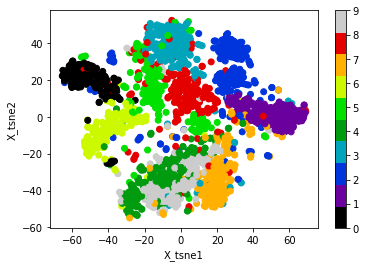

In [60]:
plot_XY(X_tsne,test_y, title_name="")

**инициализация сессии**

In [78]:
BATCH_SIZE  = 50    # for minibatch gradient descent
N_OF_BATCHS = 1     # It is better to use all batches per epoch but it may take too much time.
                    # For set all batches use: int(mnist.train.images.shape[0]/BATCH_SIZE)
LR          = 0.005 # learning rate
EPOCHS      = 5000


sess = tf.Session()

model_path = "/tmp/model_cnn.h5py"

**описание графа сессии**

In [79]:
tf.reset_default_graph() 
    
x = tf.placeholder("float", [None, IMAGE_SIZE[0],IMAGE_SIZE[1],1])
    
y = tf.placeholder("float", [None, N_CLASSES])
    
optimizer, loss_val, predictor, W, B = compil_training_model(x, y, LR)    
    
accuracy = get_accuracy(predictor, y)

**тренеровка**

обратите внимание, каждая сессия записывается 

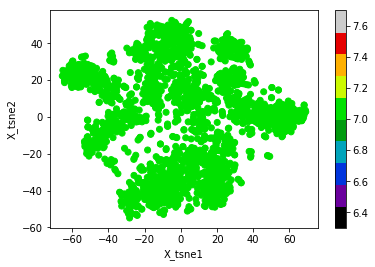

Step: 0 | train loss: 2.3442 | test accuracy: 0.10
Model saved in file: /tmp/model_cnn.h5py


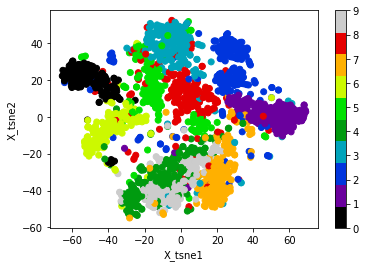

Step: 500 | train loss: 0.0477 | test accuracy: 0.53
Model saved in file: /tmp/model_cnn.h5py


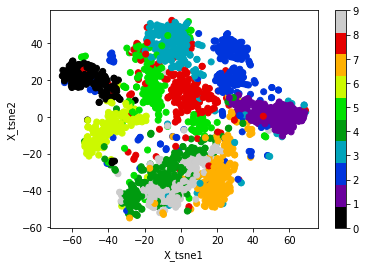

Step: 1000 | train loss: 0.1453 | test accuracy: 0.68
Model saved in file: /tmp/model_cnn.h5py


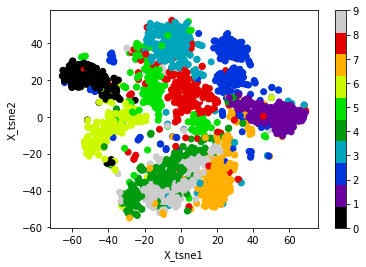

Step: 1500 | train loss: 0.0075 | test accuracy: 0.75
Model saved in file: /tmp/model_cnn.h5py


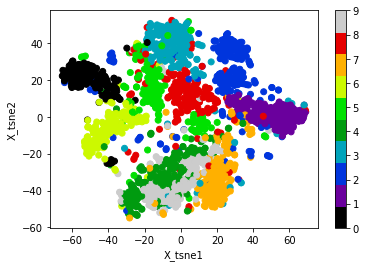

Step: 2000 | train loss: 0.0095 | test accuracy: 0.80
Model saved in file: /tmp/model_cnn.h5py


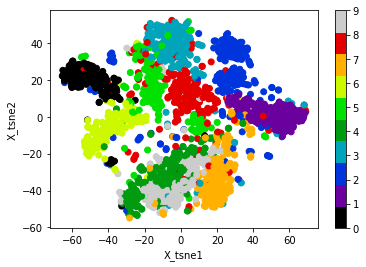

Step: 2500 | train loss: 0.2045 | test accuracy: 0.83
Model saved in file: /tmp/model_cnn.h5py


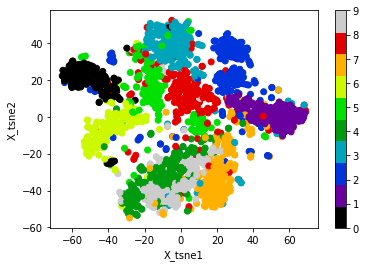

Step: 3000 | train loss: 0.0257 | test accuracy: 0.85
Model saved in file: /tmp/model_cnn.h5py


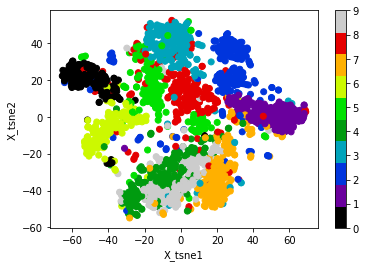

Step: 3500 | train loss: 0.0187 | test accuracy: 0.87
Model saved in file: /tmp/model_cnn.h5py


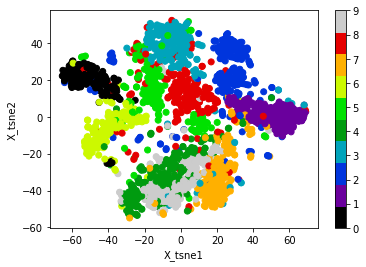

Step: 4000 | train loss: 0.0746 | test accuracy: 0.88
Model saved in file: /tmp/model_cnn.h5py


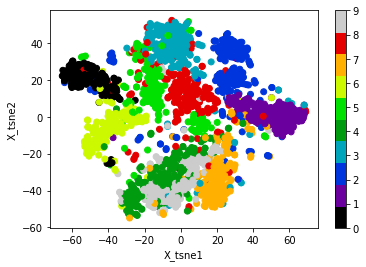

Step: 4500 | train loss: 0.0208 | test accuracy: 0.89
Model saved in file: /tmp/model_cnn.h5py


In [80]:
with tf.Session() as sess:
        
    init_op = tf.group(tf.global_variables_initializer(), 
                            tf.local_variables_initializer())        
    sess.run(init_op)
        
    saver = tf.train.Saver()
    
    loss_ = np.zeros(N_OF_BATCHS)
    
    for step in range(EPOCHS):      

        for i in range(N_OF_BATCHS):
            
            b_x, b_y  = mnist.train.next_batch(BATCH_SIZE)
            
            image_x   = b_x.reshape([-1,28,28,1])    
              
            _, loss_[i] = sess.run([optimizer, loss_val], {x: image_x, y: b_y})
        
        if step % (EPOCHS/10) == 0:  
                
            outputs = sess.run(predictor,{x: image_test_x, y: test_y})
            
            accuracy_ = sess.run(accuracy, {x: image_test_x, y: test_y})

            plot_XY(X_tsne,outputs, title_name="")
                
            print('Step:', step, 
                  '| train loss: %.4f' % np.mean(loss_), 
                  '| test accuracy: %.2f' % accuracy_)

            save_path = saver.save(sess, model_path)
            print("Model saved in file: %s" % save_path)
        

### Этап предсказания


In [72]:
predictor = conv_net(x, W,B)
    
with tf.Session() as sess:
        
    saver     = tf.train.Saver()  
    
    load_path = saver.restore(sess, model_path)
    
    outputs   = sess.run(predictor,{x: image_test_x})
        
outputs = outputs.argmax(axis=1)

lables  = np.argmax(test_y, 1)
        
print(outputs[10:50], 'prediction number \n')
print(lables[10:50], 'real number \n')       


INFO:tensorflow:Restoring parameters from /tmp/model_cnn.h5py
[0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1
 2 4 4] prediction number 

[0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1
 2 4 4] real number 



### Анализ работы сети

In [73]:
idx_error = np.not_equal(lables,outputs)
errors    = lables[idx_error==True]
idx       = np.flatnonzero(idx_error==True)
        
print('erros ',errors)
print('erros in  ',idx)



erros  [9 4 4 5 8 2 5 2 8 6 4 6 9 9 8 5 1 8 3 9 8 9 8 0]
erros in   [  92  115  247  340  582  646  720  924  947 1014 1112 1182 1232 1247
 1319 1393 1527 1530 1681 1697 1878 1901 1955 1987]


**анализ ошибок в 7**

In [74]:
idx_test = idx[errors==7]

print(outputs[idx_test], 'prediction number 7 \n')

print(lables[idx_test], 'real number \n')  

print(idx_test)

[] prediction number 7 

[] real number 

[]


визуализация ошибочно детектированных 7-к 

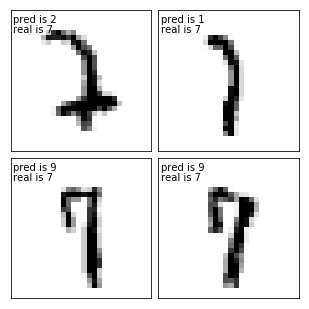

In [68]:
idx_test_edge = int(np.sqrt(idx_test.shape[0]))
idx_test_size = (idx_test_edge)**2

fig = plt.figure(figsize=(4, 4)) # create fugure 

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(idx_test_size):

    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(idx_test_edge, idx_test_edge, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(mnist.test.images[idx_test[i]].reshape((IMAGE_SIZE[0],IMAGE_SIZE[1])), cmap='binary')
    # label the image with the target value
    ax.text(0, 2, 'pred is '+str(outputs[idx_test[i]]))
    ax.text(0, 4, 'real is '+str(lables[idx_test[i]]))
# Show the plot
plt.show()

## 4.2 Упражнения

1. Исследовать другие ошибки сети

2. Исследовать работу сети от скорости обучения и других параметров

3. Сравнить сверточную и полносвязную сети
(заменить блоки `conv+pool` на полносвязные `dense` )